In [1]:
%matplotlib inline
print(__doc__)

import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
from sklearn.cluster import SpectralClustering
from sklearn.metrics.cluster import adjusted_rand_score

np.random.seed(0)

Automatically created module for IPython interactive environment


In [2]:
var = 1.5

In [3]:
def make_moons(n_samples=1000, shuffle=True, noise=var, random_state=None):
    """
    Parameters
    ----------
    n_samples : The total number of points generated.
    noise : double or None (default=None)
        Standard deviation of Gaussian noise added to the data.
    Returns
    -------
    X : array of shape [n_samples, 2]
        The generated samples.
    y : array of shape [n_samples]
        The integer labels (0 or 1) for class membership of each sample.
    """

    n_samples_out = n_samples // 2
    n_samples_in = n_samples - n_samples_out

    outer_circ_x = 10*np.cos(np.linspace(0, np.pi, n_samples_out))
    outer_circ_y = 10*np.sin(np.linspace(0, np.pi, n_samples_out))
    inner_circ_x = 10*(1 - np.cos(np.linspace(0, np.pi, n_samples_in)))
    inner_circ_y = 10*(1 - np.sin(np.linspace(0, np.pi, n_samples_in)) - .5)

    X = np.vstack([np.append(outer_circ_x, inner_circ_x),
                   np.append(outer_circ_y, inner_circ_y)]).T
    y = np.hstack([np.zeros(n_samples_out, dtype=np.intp),
                   np.ones(n_samples_in, dtype=np.intp)])


    if noise is not None:
        X += np.random.normal(0,noise,size = X.shape)

    return X, y

In [4]:
moons = make_moons()

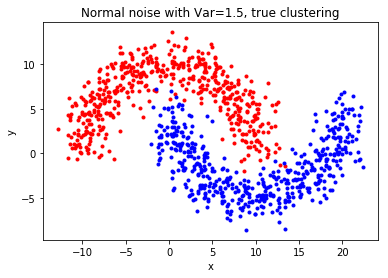

In [5]:
for i in  range(len(moons[1])):
    if moons[1][i] == 0:
        plt.plot(moons[0][i, [0]],moons[0][i, [1]],'.',color='r')
    else:
        plt.plot(moons[0][i, [0]],moons[0][i, [1]],'.',color='b')
        
plt.xlabel('x')
plt.ylabel('y')
plt.title('Normal noise with Var=' + str(var) + ', true clustering'  )
    
    
plt.savefig("moons_noise_"+ str(var) + "_true.pdf")

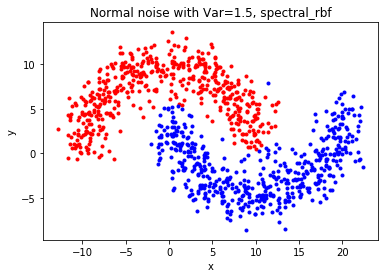

In [6]:
clustering = SpectralClustering(n_clusters=2,
                                eigen_solver='arpack',
                                affinity='rbf').fit(moons[0])

for i in  range(len(moons[1])):
    if clustering.labels_[i] == 0:
        plt.plot(moons[0][i, [0]],moons[0][i, [1]],'.',color='r')
    else:
        plt.plot(moons[0][i, [0]],moons[0][i, [1]],'.',color='b')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Normal noise with Var=' + str(var) + ', spectral_rbf'  )

plt.savefig("moons_noise_"+ str(var) + "_rbf.pdf")

In [7]:
adjusted_rand_score(moons[1], clustering.labels_)

0.9024023362942315

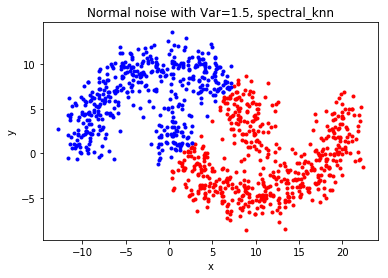

In [8]:
clustering = SpectralClustering(n_clusters=2,
                                eigen_solver='arpack',
                                affinity='nearest_neighbors').fit(moons[0])#df_circles)

for i in  range(len(moons[1])):
    if clustering.labels_[i] == 0:
        plt.plot(moons[0][i, [0]],moons[0][i, [1]],'.',color='r')
    else:
        plt.plot(moons[0][i, [0]],moons[0][i, [1]],'.',color='b')
        # color only points with label 0
plt.xlabel('x')
plt.ylabel('y')
plt.title('Normal noise with Var=' + str(var) + ', spectral_knn'  )

plt.savefig("moons_noise_"+ str(var) + "_knn.pdf")

In [9]:
adjusted_rand_score(moons[1], clustering.labels_)

0.3404013295021514

In [10]:
# n_samples = 1000
# noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
# noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
#                                       noise=.05)